<h1>Importar librerías necesarias</h1>

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

<h1>Importar archivos</h1>

In [2]:
with open("../Modelos/s2q_90K_250/history.txt", "r") as f:
    history_s2q = json.load(f)

with open("../Modelos/q2s_90K_250/history.txt", "r") as f:
    history_q2s = json.load(f)

In [3]:
for item in history_s2q.keys():
    print(item)

loss
accuracy
val_loss
val_accuracy


<h1>Función creadora de gráficos</h1>

In [4]:
def graficar_juntos(history, prefix):
    arr_colors = ["blue", "orange", "green","red"]
    arr_titles = list(history.keys())
    
    fig, axs = plt.subplots(2, 2, figsize=(20,11))    
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.15)
    
    arr_x = np.arange(0,250)
    plt.setp(axs, xticks=np.arange(0,251,25))
    
    for i in range(4):
        # Coordenadas del sub gráfico
        sg_x = i // 2
        sg_y = i % 2

        arr_x = np.arange(0,250)
        arr_y = history[arr_titles[i]]
        title = prefix + " " + arr_titles[i].capitalize()

        axs[sg_x, sg_y].plot(arr_x, arr_y, arr_colors[i])
        axs[sg_x, sg_y].set_title(title, fontweight="bold", size=18)

        #axs[sg_x, sg_y].set_xlabel("epochs", fontsize=14)    
        axs[sg_x, sg_y].grid(True)

        # Si se pone afuera del loop, sólo afecta a axs[1, 1]    
        fig.sca(axs[sg_x, sg_y])
        plt.locator_params(axis='y', nbins=10)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)

    plt.show()

In [5]:
def graficar_individual(history, prefix):
    
    arr_colors = ["blue", "orange", "green","red"]
    arr_titles = list(history.keys())
    
    for index in range(4):
        plt.figure(figsize=(20,10))
        
        arr_x = np.arange(0,250)
        
        plot_title = "{} {}".format(prefix, arr_titles[index].capitalize())
        plt.title(plot_title, fontsize=32)
        plt.plot(arr_x, history[arr_titles[index]], c=arr_colors[index])
        plt.xticks(ticks=np.arange(0,251,25), fontsize=16)
        plt.yticks(fontsize=16)
        
        plt.grid(True)
        
        file_name = "./{}_{}.png".format(prefix, arr_titles[index])
        plt.savefig(file_name)
        #plt.show()

<h1>Muestra gráficos</h1>

<h3 style="color:crimson">Español --&gt Quechua</h3>

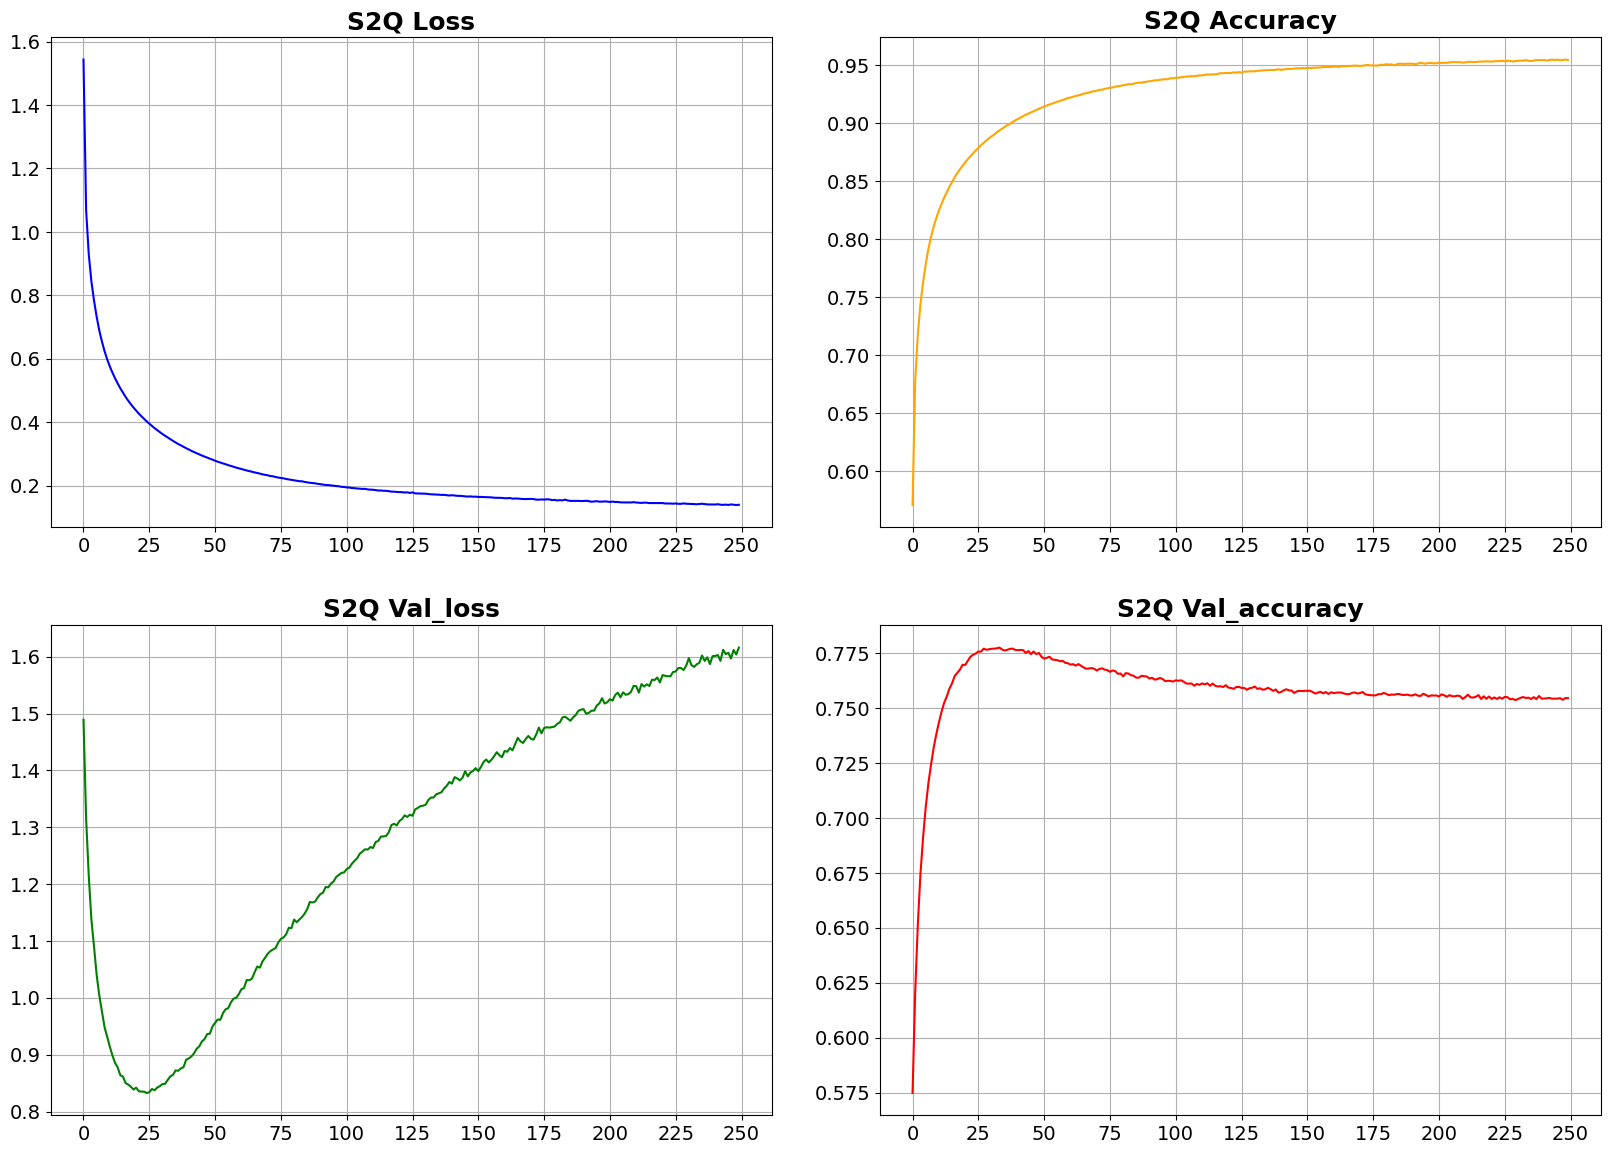

In [6]:
graficar_juntos(history_s2q, "S2Q")

<h3 style="color:crimson">Quechua --&gt Español</h3>

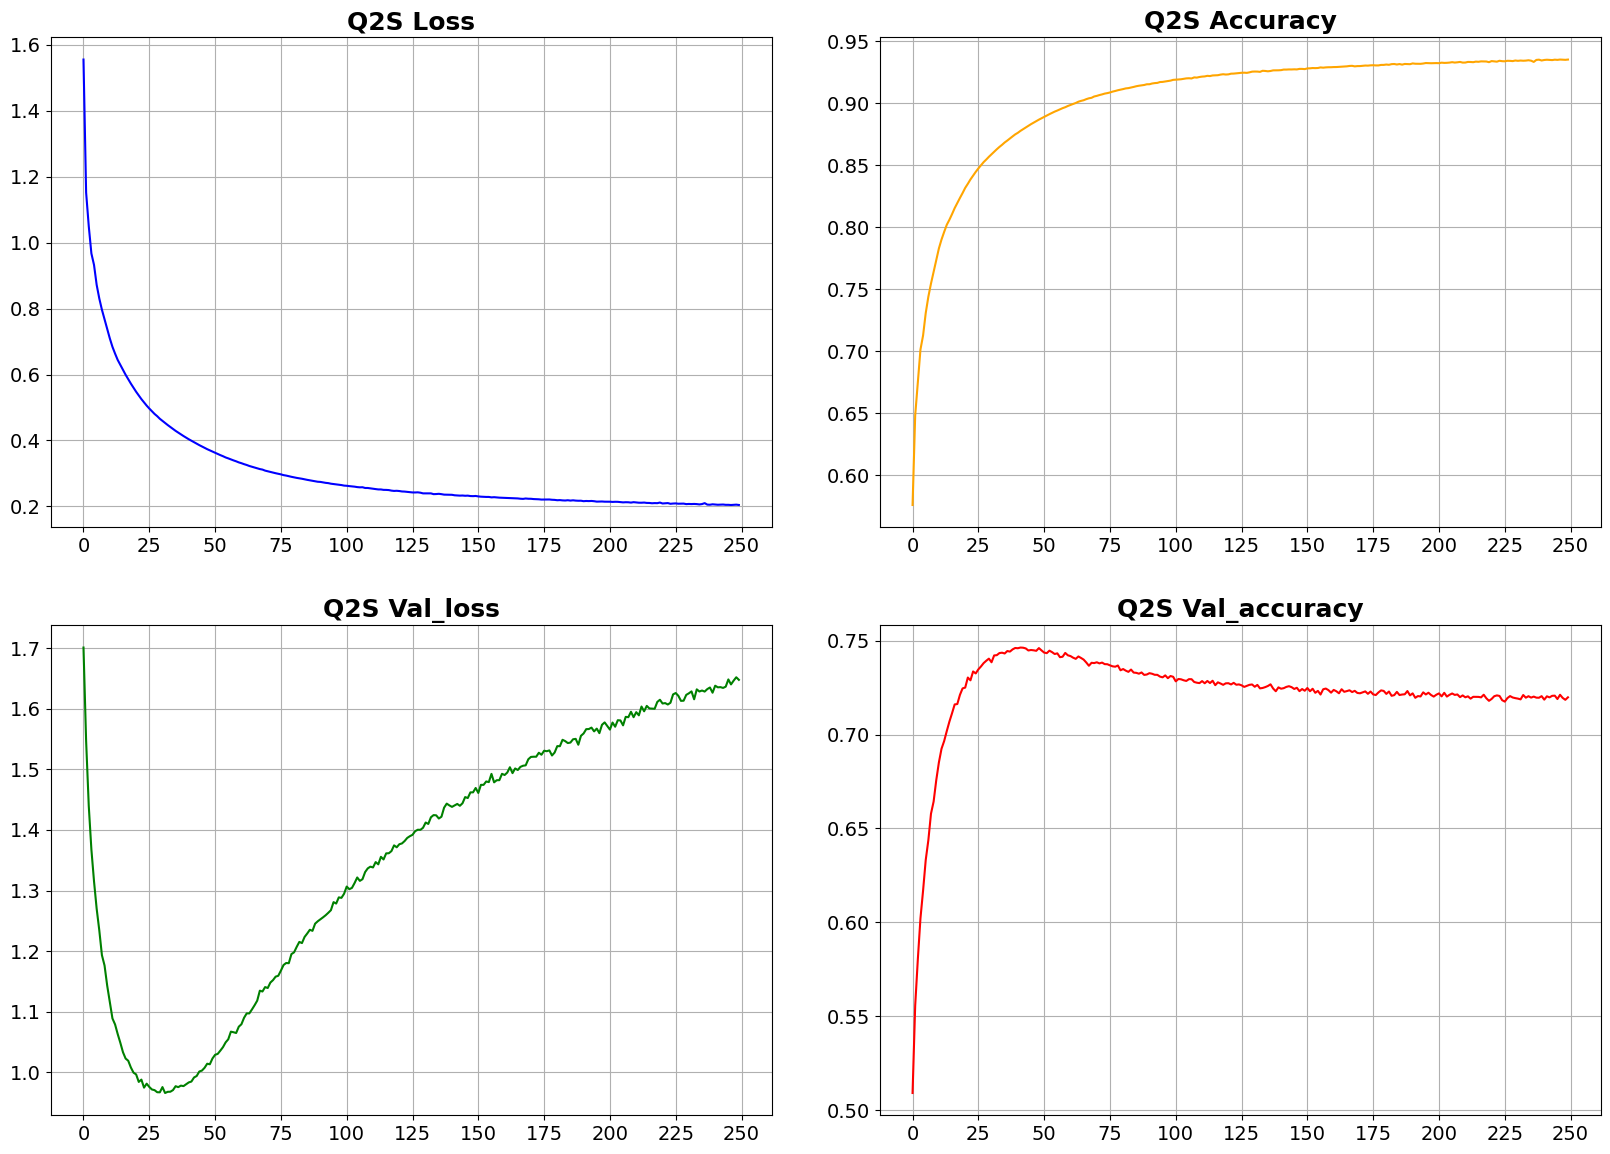

In [7]:
graficar_juntos(history_q2s, "Q2S")

<h1>Grabar imágenes en disco</h1>

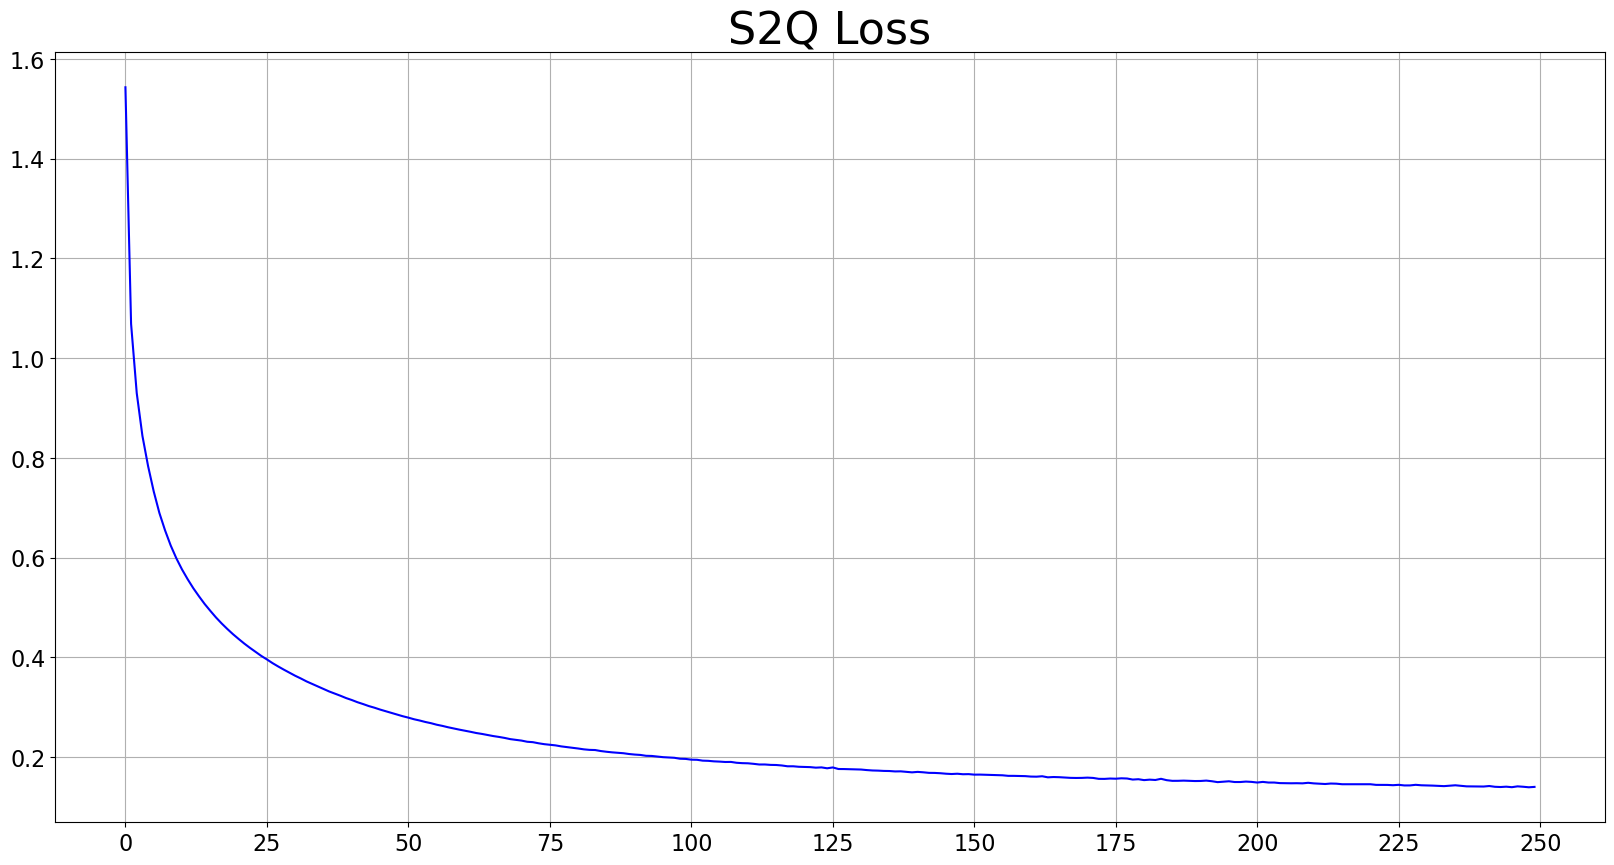

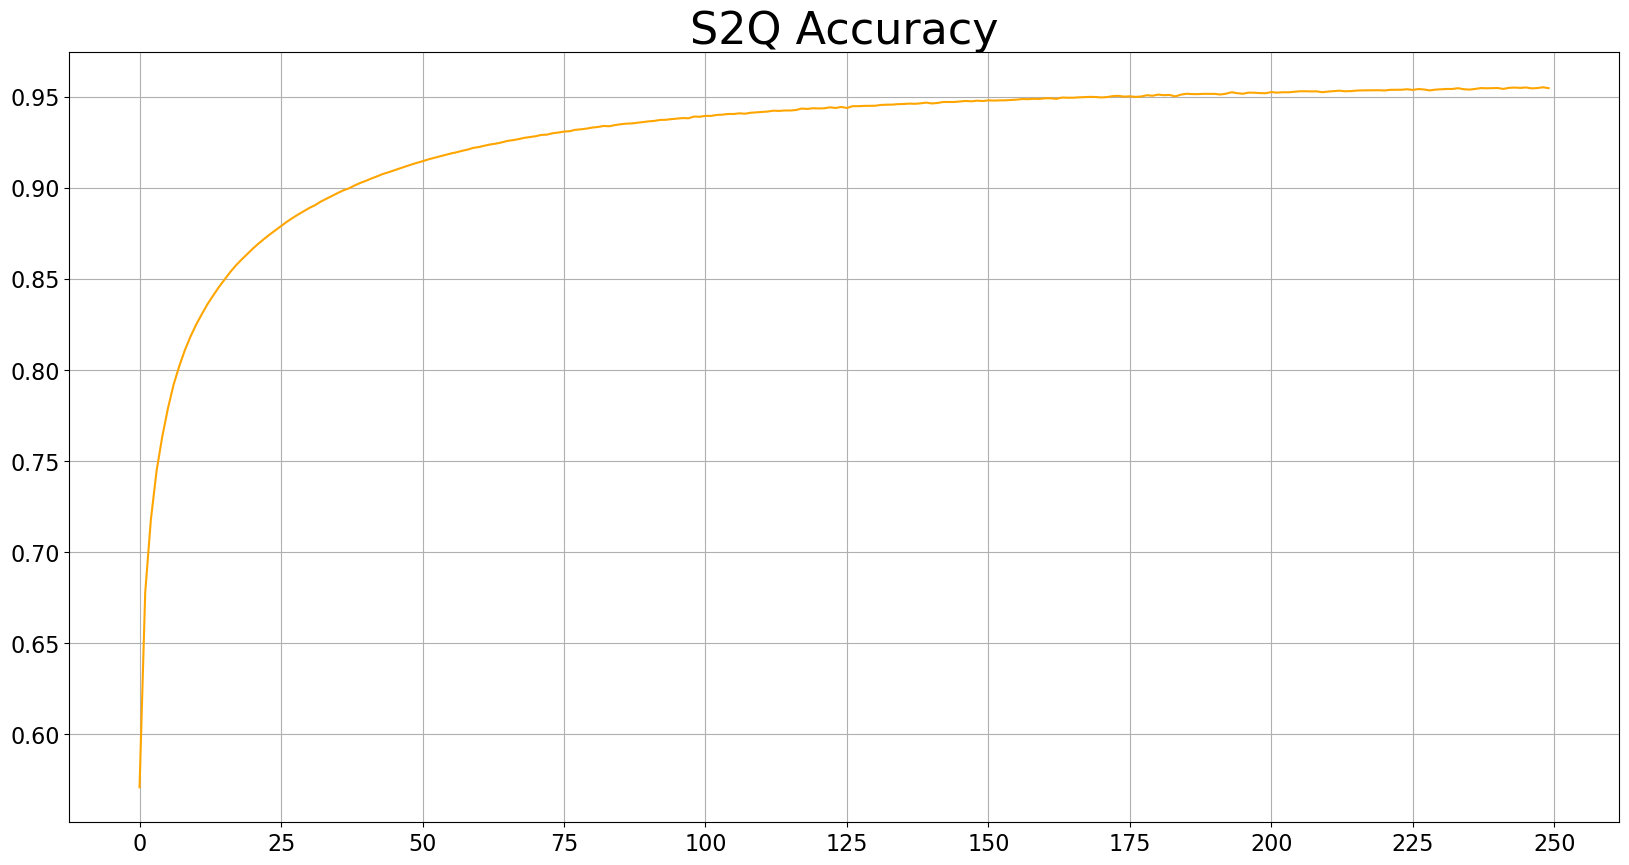

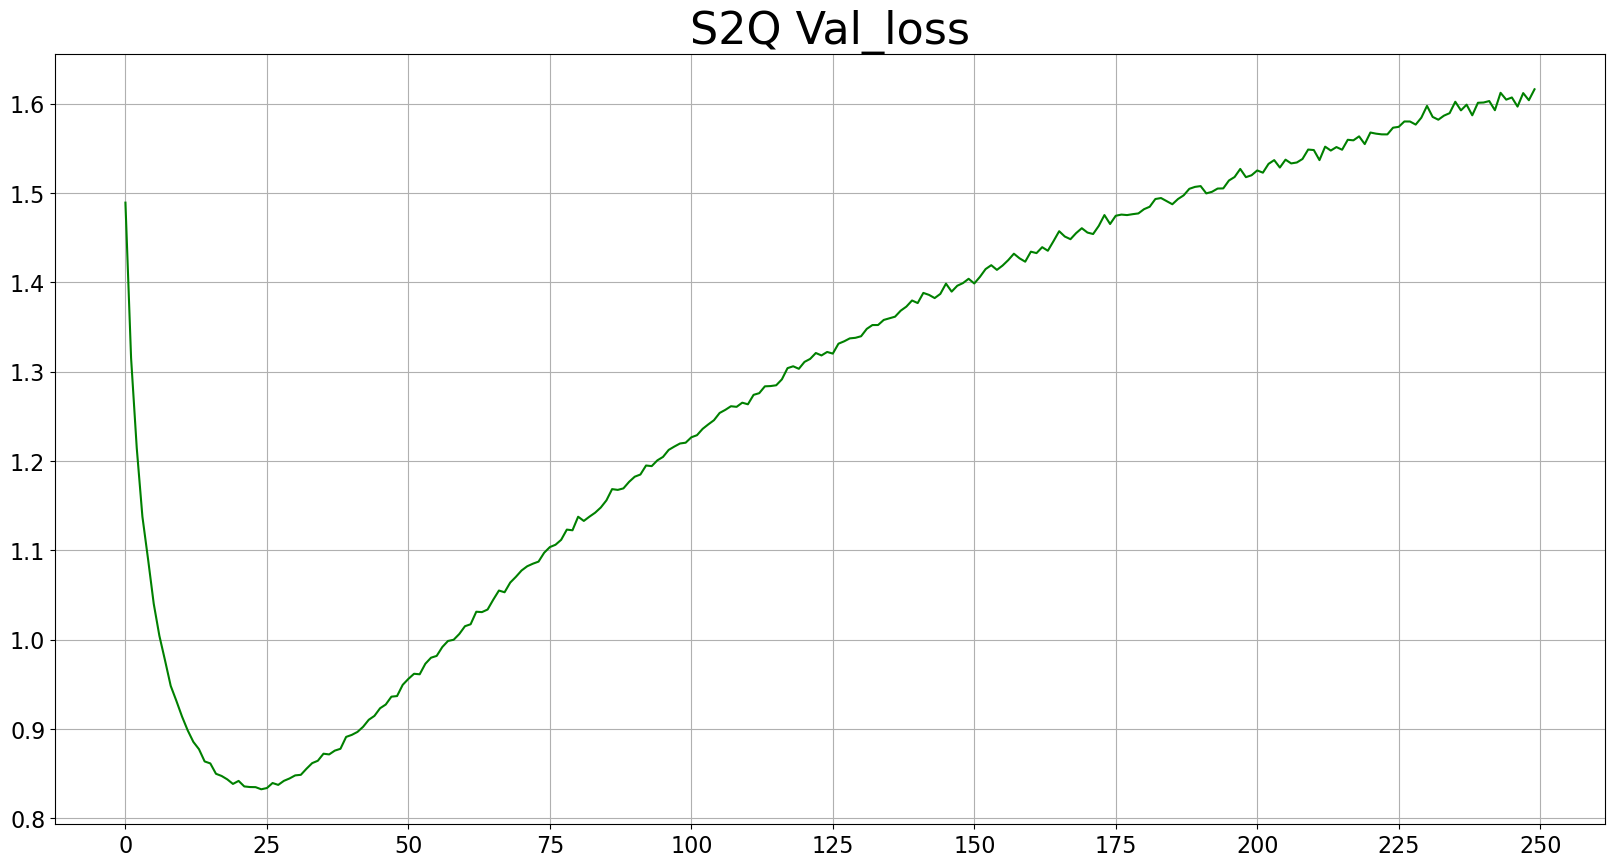

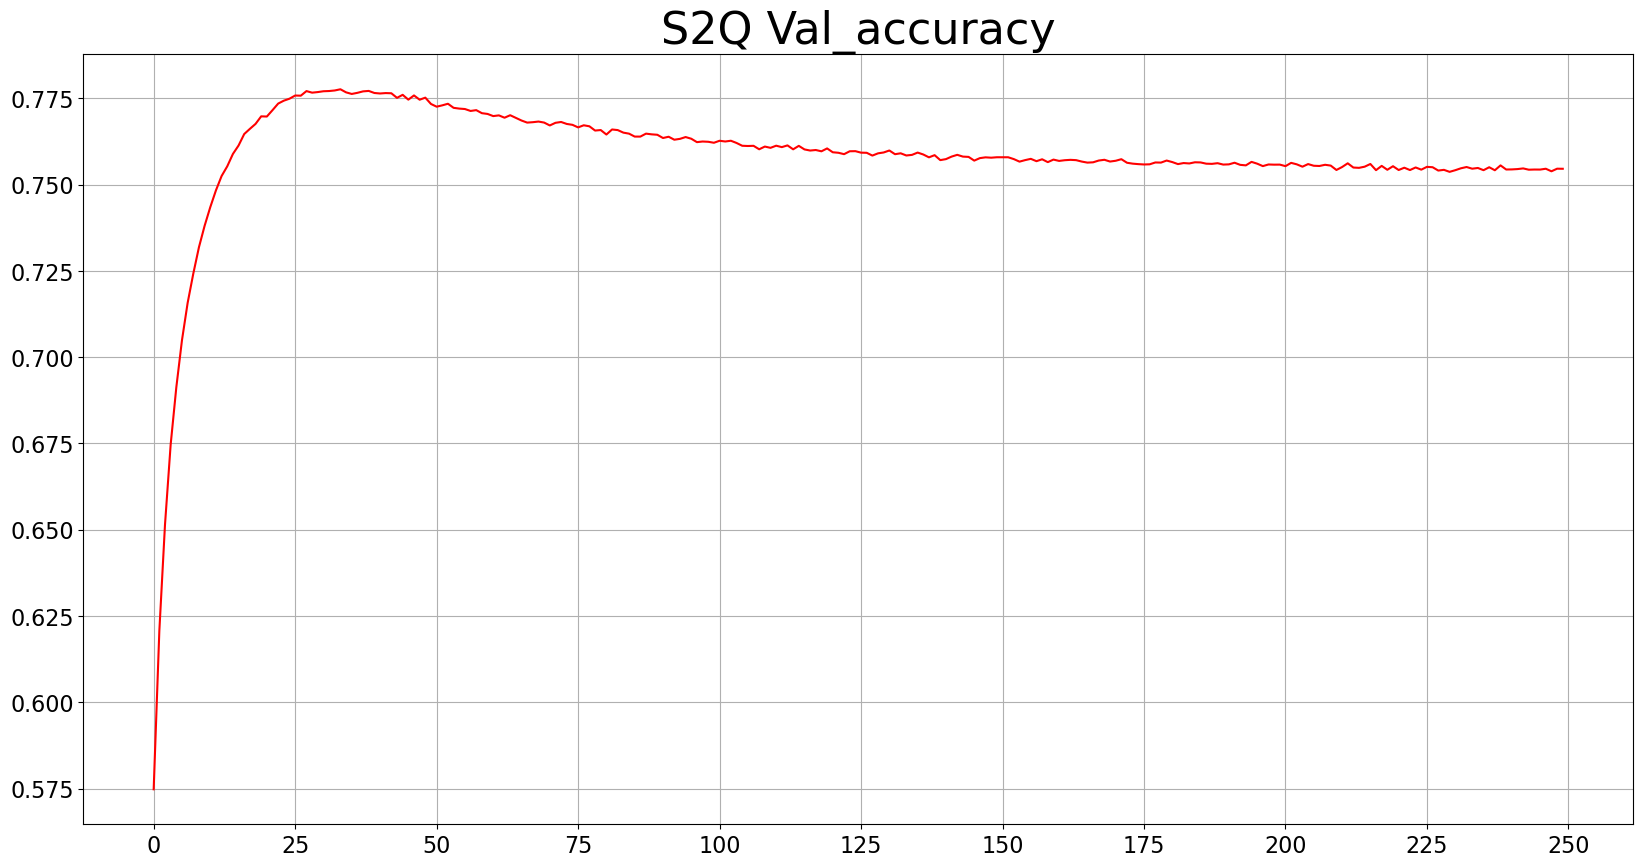

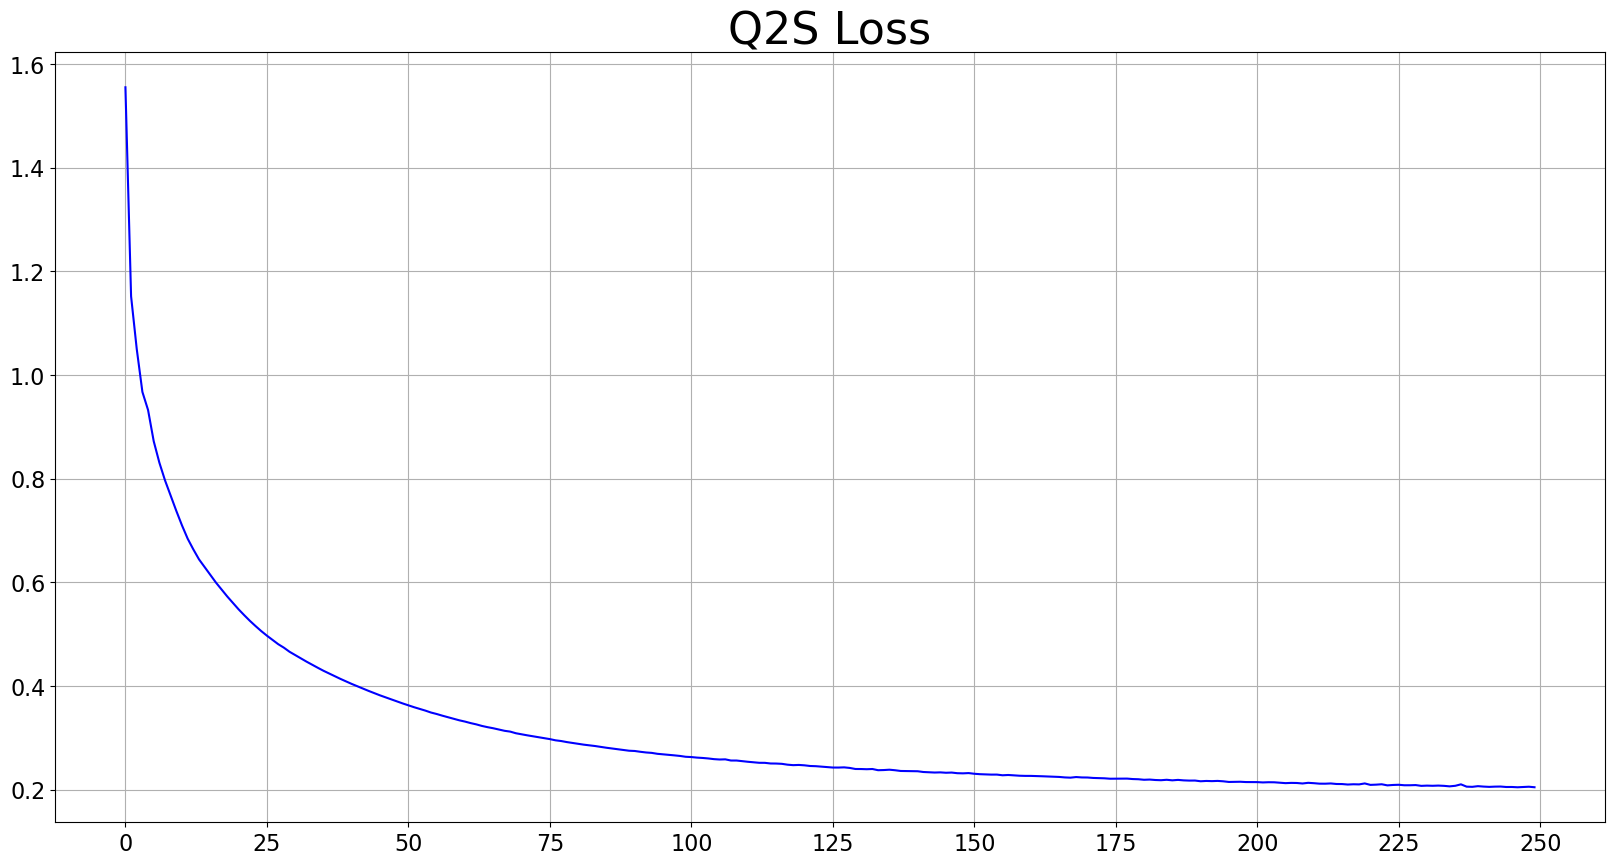

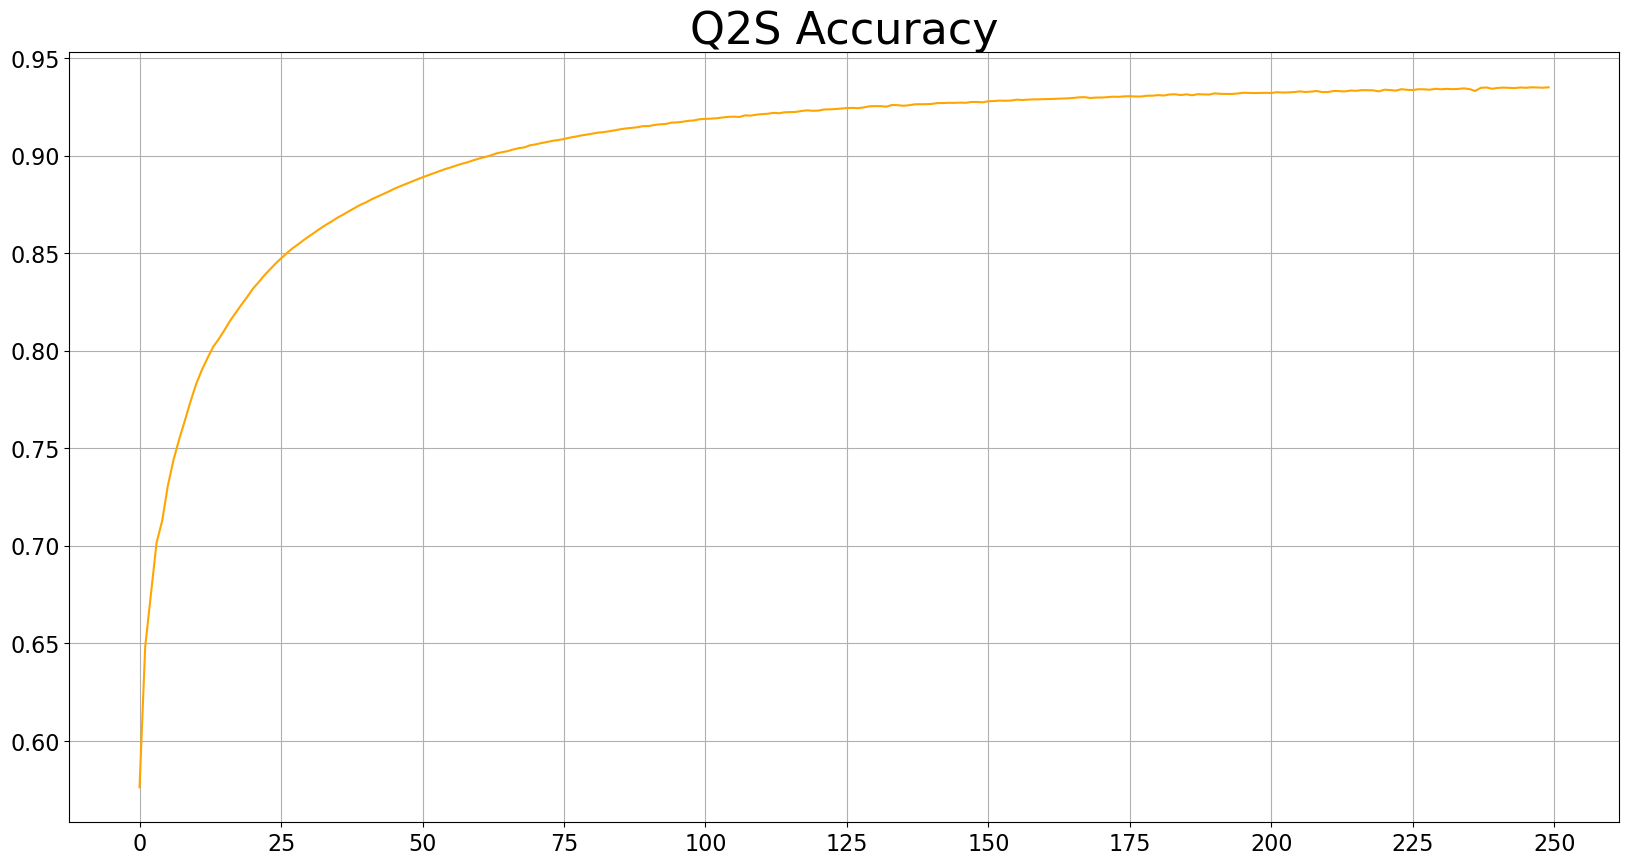

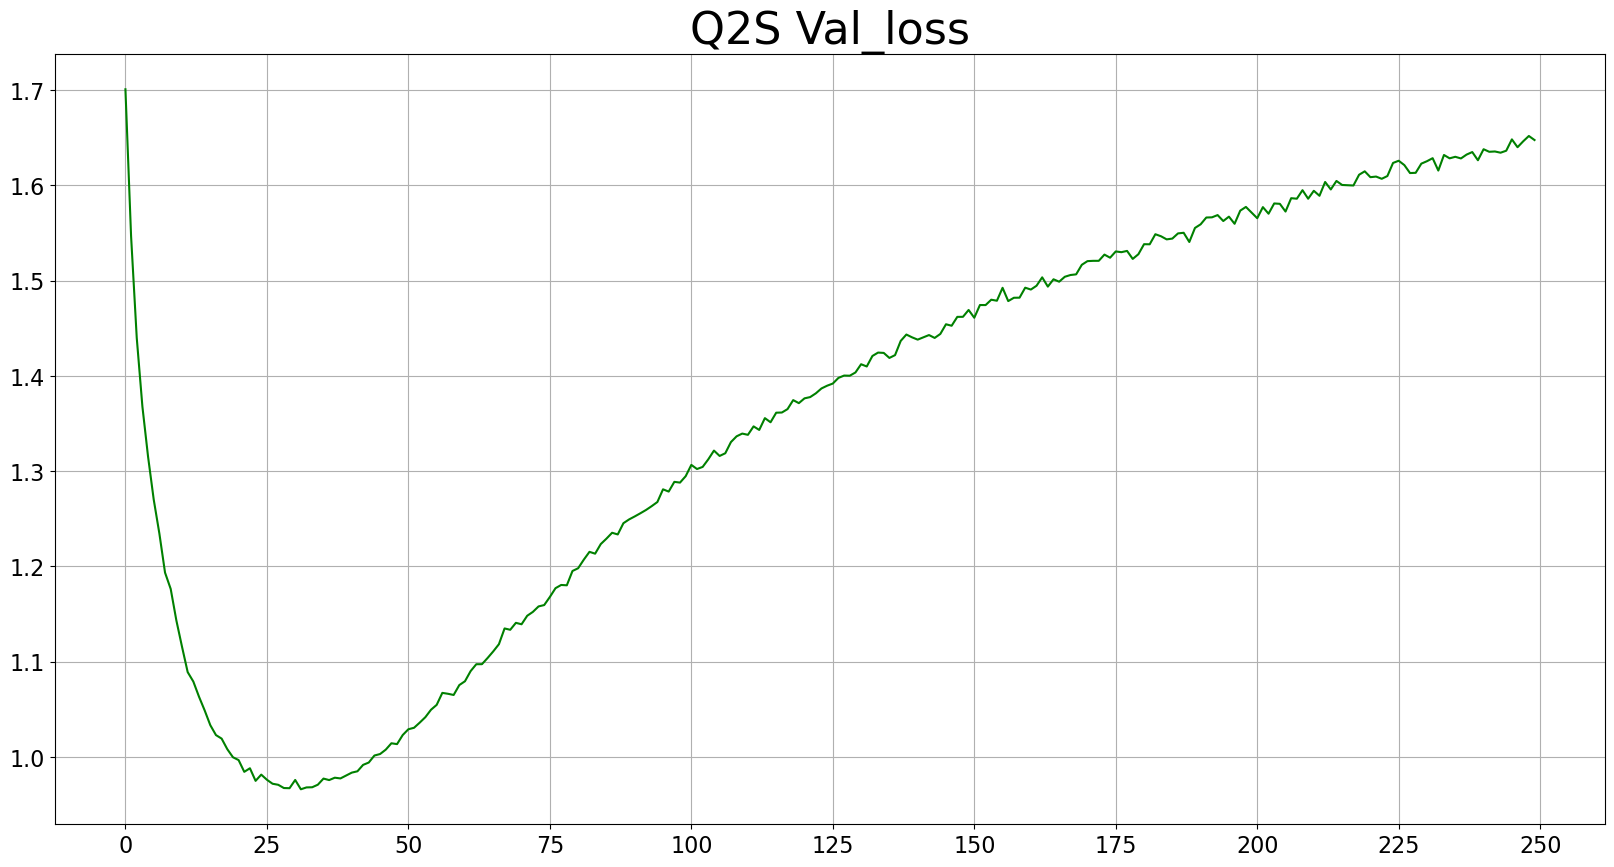

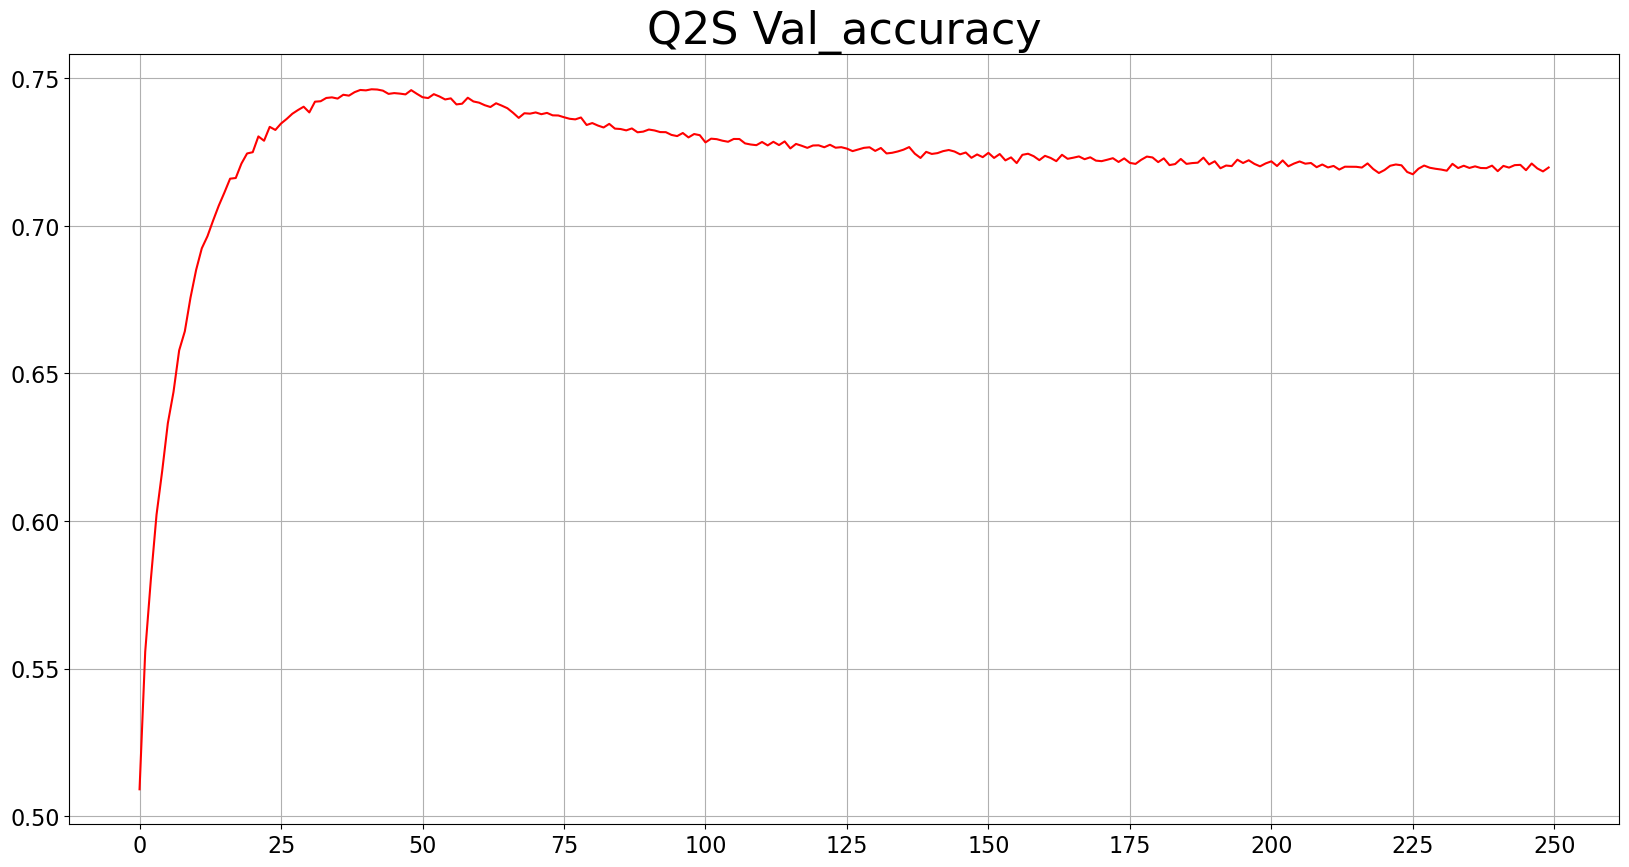

In [8]:
graficar_individual(history_s2q, "S2Q")
graficar_individual(history_q2s, "Q2S")